In [1]:
import random
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [3]:
data = {
    'a': np.random.randn(10000),
    'b': np.random.randn(10000)
}
data['a1'] = [i * random.randint(100, 130) for i in data['a']]
data['a2'] = [i * random.random() * 0.1 for i in data['a']]
data['b1'] = [i * random.randint(10, 13) for i in data['b']]
data['b2'] = [i * random.random() * 0.05 for i in data['b']]
df = pd.DataFrame(data)
df['ab'] = df['a'] * df['b']
df['a + b'] = df['a'] + df['b']
df.head()

,a,b,a1,a2,b1,b2,ab,a + b
0,-0.152645,-0.134183,-18.775380,-0.008827,-1.341835,-0.001700,0.020482,-0.286829
1,1.087881,0.552521,135.985185,0.084426,5.525210,0.026634,0.601077,1.640403
2,0.773221,-1.190583,95.106204,0.072953,-14.287002,-0.052142,-0.920584,-0.417362
3,-0.317568,-0.183074,-41.283843,-0.031618,-2.196883,-0.008568,0.058138,-0.500642
4,1.159112,-1.087470,132.138778,0.086536,-10.874701,-0.023362,-1.260500,0.071642


In [6]:
X_train = df[:5000]
X_test = df[5000:]

In [7]:
pca = PCA(n_components=2)

In [8]:
pca.fit(X_train)

PCA(n_components=2)

In [9]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.98944792 0.01047397]
[8145.31041687  838.04394233]


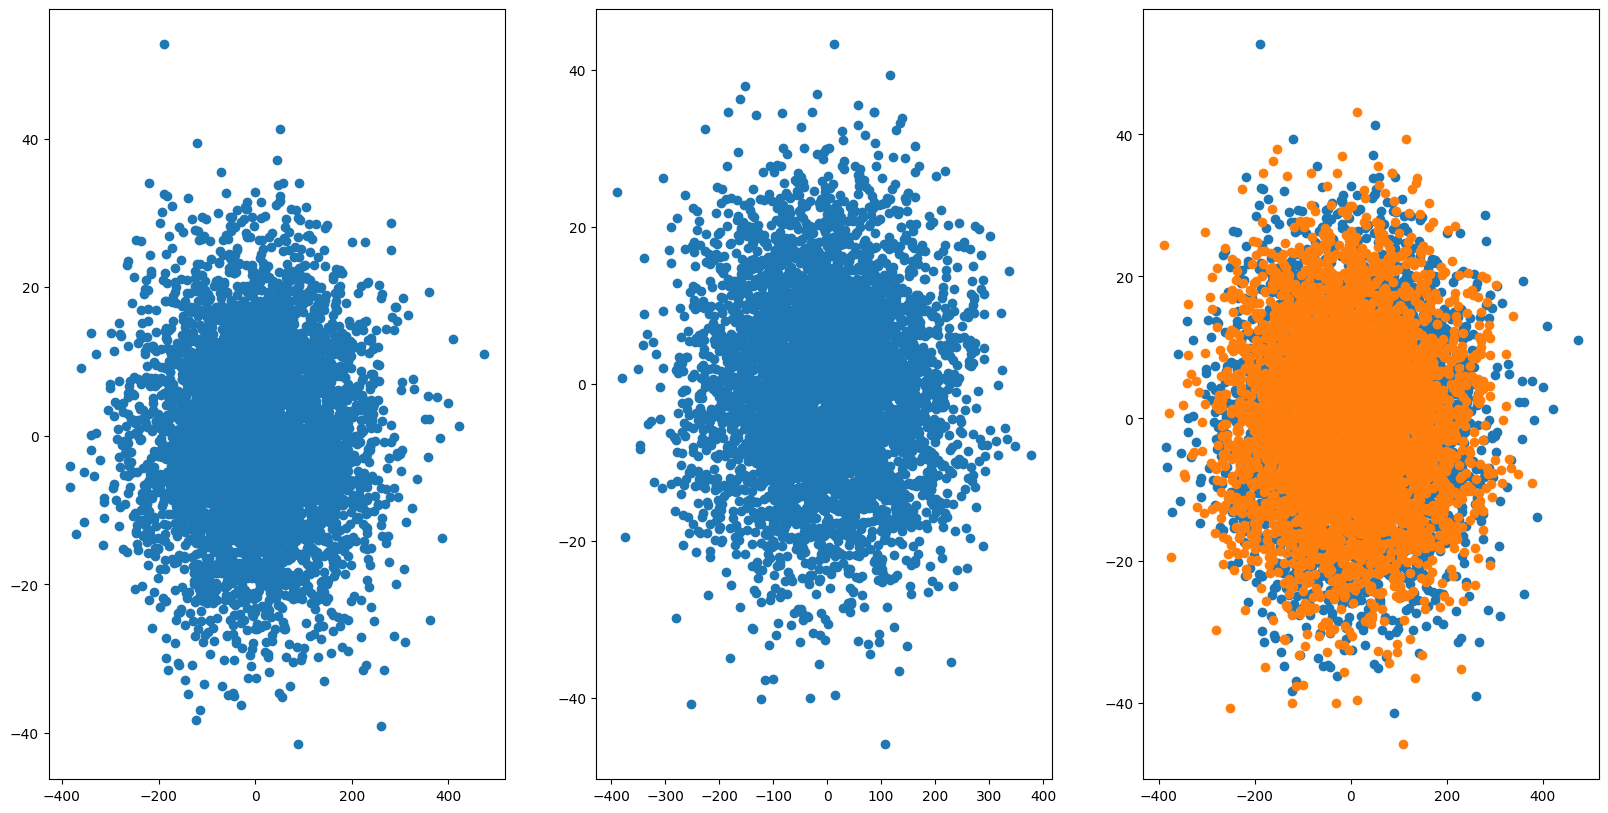

In [11]:
transformed_train = pca.transform(X_train)
transformed_test = pca.transform(X_test)
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.scatter(transformed_train[:, 0], transformed_train[:, 1])
plt.subplot(1, 3, 2)
plt.scatter(transformed_test[:, 0], transformed_test[:, 1])
plt.subplot(1, 3, 3)
plt.scatter(transformed_train[:, 0], transformed_train[:, 1])
plt.scatter(transformed_test[:, 0], transformed_test[:, 1])

In [12]:
from sklearn.cluster import  KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import  PCA
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

In [13]:
print(f'digits: {n_digits}; n_sample: {n_samples}; features: {n_features}')

digits: 10; n_sample: 1797; features: 64


In [22]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=5)
kmeans.fit(reduced_data)

KMeans(n_clusters=10, n_init=5)

In [23]:
h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [24]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

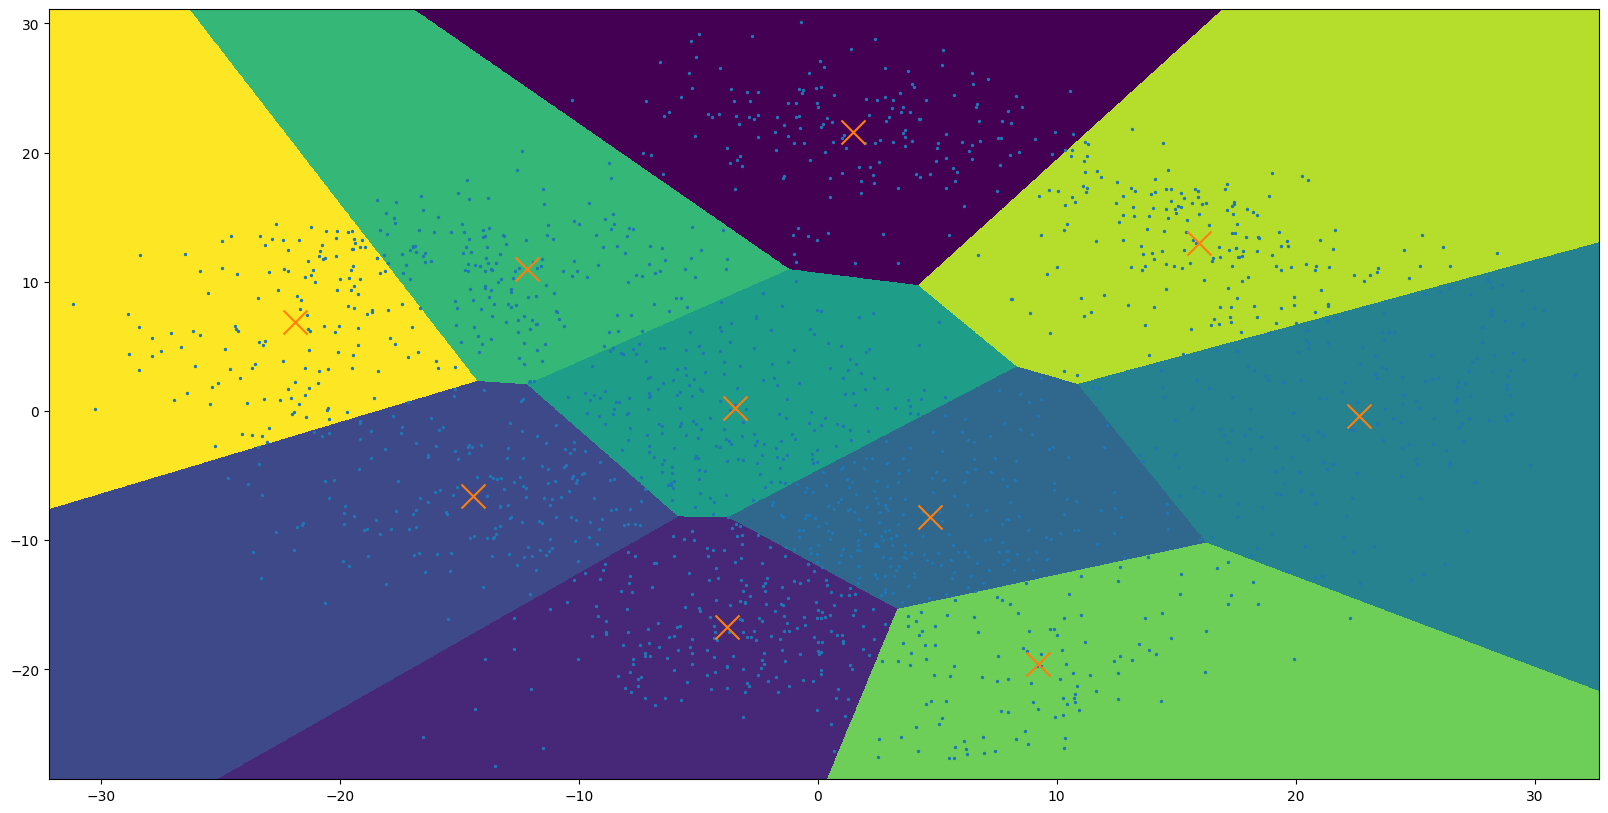

In [34]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',origin='lower')
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=2)
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='x',
    s=300
)